In [59]:
import pandas as pd
from scipy.stats import jarque_bera
import my_afml_fncs

In [11]:
volume_bars_df=pd.read_csv('./tick_data/bars/volume_bars_barchart10k.csv')

In [12]:
volume_bars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61564 entries, 0 to 61563
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  61564 non-null  object 
 1   Open    61564 non-null  float64
 2   High    61564 non-null  float64
 3   Low     61564 non-null  float64
 4   Close   61564 non-null  float64
 5   Volume  61564 non-null  int64  
 6   Time    61564 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.3+ MB


In [13]:
volume_bars_df.head()

,Symbol,Open,High,Low,Close,Volume,Time
0,ESH23,3895.00,3900.00,3883.25,3885.00,10332,2023-01-02 23:00:00
1,ESH23,3885.00,3885.50,3869.50,3869.75,10228,2023-01-02 23:10:00
2,ESH23,3869.50,3872.00,3863.00,3863.25,10223,2023-01-02 23:36:00
3,ESH23,3863.00,3866.75,3862.25,3863.00,10017,2023-01-03 00:14:00
4,ESH23,3863.25,3863.75,3846.50,3847.75,10844,2023-01-03 00:51:00


In [35]:
rolled=my_afml_fncs.getRolledSeries(volume_bars_df)
rolled.index=pd.to_datetime(rolled.index)

In [36]:
weekly=rolled['Close'].resample('W').count()

In [39]:
autocorrelation=weekly.autocorr(lag=1)

In [40]:
rolled['Returns']=rolled['Close'].pct_change()

In [55]:
monthly_variance=rolled['Returns'].resample('ME').var()

In [56]:
monthly_variance.var()


np.float64(5.202925021514066e-14)

In [57]:
returns = rolled['Returns'].dropna()


In [63]:
jb_stat, jb_pvalue = jarque_bera(returns)


In [62]:
print(f"Jarque-Bera Test Statistic: {jb_stat}")
print(f"p-value: {jb_pvalue}")

# Interpretation
if jb_pvalue < 0.05:
    print("Reject the null hypothesis: Returns are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Returns are normally distributed.")


Jarque-Bera Test Statistic: 336178.0522068954
p-value: 0.0
Reject the null hypothesis: Returns are not normally distributed.


In [76]:
window = 100  # Default rolling window size
percentage_width = 0.01  # 5% width

# Step 1: Calculate the Simple Moving Average (SMA) for Close prices
rolled['SMA'] = rolled['Close'].rolling(window=window).mean()

# Step 2: Calculate the Upper and Lower Bollinger Bands with 5% width
rolled['Upper Band'] = rolled['SMA'] + (rolled['SMA'] * percentage_width)
rolled['Lower Band'] = rolled['SMA'] - (rolled['SMA'] * percentage_width)

# Step 3: Inspect the DataFrame (now contains Bollinger Bands)
print(rolled[['Close', 'SMA', 'Upper Band', 'Lower Band']].tail())


                       Close        SMA   Upper Band   Lower Band
Time                                                             
2024-12-31 20:58:00  5935.00  5946.8900  6006.358900  5887.421100
2024-12-31 21:00:00  5936.25  5946.7325  6006.199825  5887.265175
2024-12-31 21:01:00  5934.75  5946.5250  6005.990250  5887.059750
2024-12-31 21:05:00  5938.25  5946.4225  6005.886725  5886.958275
2024-12-31 21:14:00  5939.00  5946.1750  6005.636750  5886.713250


In [77]:
# Step 1: Initialize the counters for crossings
crossed_above = 0
crossed_below = 0

# Step 2: Iterate through the DataFrame to count crossings
for i in range(1, len(rolled)):
    # Check if Close crosses above the Upper Band
    if (rolled['Close'].iloc[i - 1] <= rolled['Upper Band'].iloc[i - 1]) and \
            (rolled['Close'].iloc[i] > rolled['Upper Band'].iloc[i]):
        crossed_above += 1

    # Check if Close crosses below the Lower Band
    if (rolled['Close'].iloc[i - 1] >= rolled['Lower Band'].iloc[i - 1]) and \
            (rolled['Close'].iloc[i] < rolled['Lower Band'].iloc[i]):
        crossed_below += 1

# Output the results
print(f"Number of times Close crossed above the Upper Band: {crossed_above}")
print(f"Number of times Close crossed below the Lower Band: {crossed_below}")

Number of times Close crossed above the Upper Band: 114
Number of times Close crossed below the Lower Band: 117


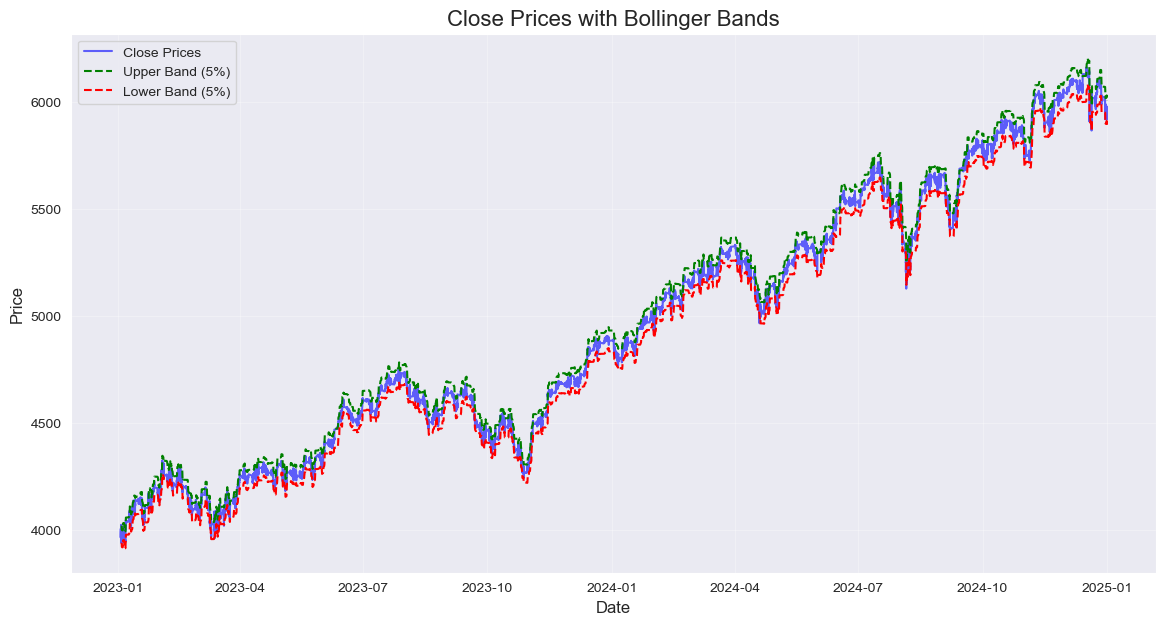

In [78]:
import matplotlib.pyplot as plt

# Step 1: Define the figure size and style
plt.figure(figsize=(14, 7))

# Step 2: Plot Close prices
plt.plot(rolled['Close'], label='Close Prices', color='blue', alpha=0.6)

# Step 3: Plot the SMA
# plt.plot(rolled['SMA'], label='SMA (20)', color='orange', linewidth=2)

# Step 4: Plot the Upper and Lower Bollinger Bands
plt.plot(rolled['Upper Band'], label='Upper Band (5%)', color='green', linestyle='--')
plt.plot(rolled['Lower Band'], label='Lower Band (5%)', color='red', linestyle='--')

# Step 5: Add chart details
plt.title('Close Prices with Bollinger Bands', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.3)

# Step 6: Show the plot
plt.show()